In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [195]:
data=pd.read_csv('data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Preprocessing

In [197]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [199]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [200]:
data.duplicated().sum()

0

In [201]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Correlation Analysis

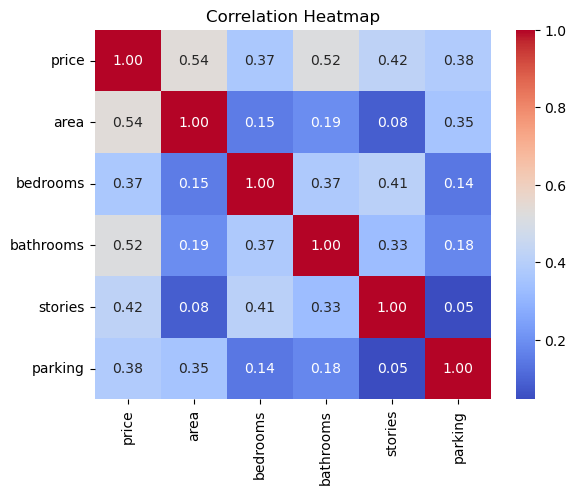

In [203]:
dc=data.select_dtypes(include=['number']).corr()
sns.heatmap(dc, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data visualization

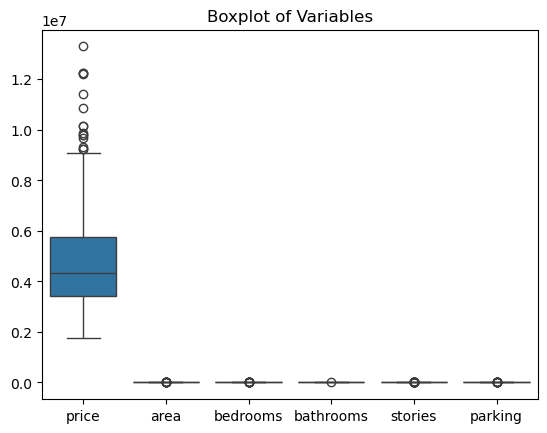

In [205]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

### One Hot Encoding

In [207]:
data_encoded = pd.get_dummies(data, columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], drop_first=True)

### Spliting X & Y

In [209]:
X = data_encoded.drop(['price'],axis=1)
y= data_encoded['price']

### Scaling

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the dataset into train and test sets

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Train Linear Regression

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)


print("Linear Regression ")
print("="*20)
print("Mean Squared Error:", linear_mse)
accuracy = linear.score(X_test,y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:',linear_r2*100,'%')

Linear Regression 
Mean Squared Error: 1754318687330.6682
Accuracy: 65.29242642153174 %
R2: 65.29242642153174 %


### Train Lasso regression

In [217]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression ")
print("="*20)
print("Mean Squared Error:", lasso_mse)
accuracy = lasso.score(X_test,y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:',lasso_r2*100,'%')

Lasso Regression 
Mean Squared Error: 1754319956976.2017
Accuracy: 65.2924013027685 %
R2: 65.2924013027685 %


### Train Ridge regression

In [219]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression ")
print("="*20)
print("Mean Squared Error:",ridge_mse)
accuracy = ridge.score(X_test,y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:',ridge_r2*100,'%')

Ridge Regression 
Mean Squared Error: 1754768938809.103
Accuracy: 65.28351861223265 %
R2: 65.28351861223265 %


In [220]:
#END